# Final Project
#### Names:
Eddie Cazares (eac4364)

Katherine (Katie) Clark (kac5676)

Adi Behre (arb5447)

Hai Hoang (hnh643)

### About the Dataset:

This dataset consists of 100,000 observations from the Data Release (DR) 18 of the Sloan Digital Sky Survey (SDSS). Each observation is described by 42 features and 1 class column classifying the observation as either:

- a STAR
- a GALAXY
- a Quasi-Stellar Object (QSO) or a Quasar.
#### Sloan Digital Sky Survey
**Link:** https://www.kaggle.com/datasets/diraf0/sloan-digital-sky-survey-dr18/data

| Column Name      | Description from dataset page                                                                                   |
|------------------|------------------------------------------------------------------------------------------------------------------|
| `objid`          | Object ID in the `PhotoObjAll` table                                                                            |
| `specobjid`      | Object ID in the `SpecObj` table                                                                                |
| `ra`             | J2000 Right Ascension                                                                                           |
| `dec`            | J2000 Declination                                                                                               |
| `redshift`       | Final redshift of the celestial object                                                                          |
| `u`              | Better of DeV/Exp magnitude fit for the Ultraviolet band                                                         |
| `g`              | Better of DeV/Exp magnitude fit for the Green band                                                               |
| `r`              | Better of DeV/Exp magnitude fit for the Red band                                                                 |
| `i`              | Better of DeV/Exp magnitude fit for the Infrared band                                                            |
| `z`              | Better of DeV/Exp magnitude fit for the Near-Infrared band                                                       |
| `run`            | Run number representing a specific SDSS observing period                                                         |
| `rerun`          | Rerun number for reprocessing the data                                                                           |
| `camcol`         | Camera column number that imaged the specific observation                                                        |
| `field`          | Field number indicating the specific portion of the sky imaged                                                   |
| `plate`          | Plate number used to mount optical fibers on the telescope                                                       |
| `fiberID`        | Optical Fiber ID responsible for gathering light from the celestial object                                       |
| `mjd`            | Modified Julian Date representing the observation time                                                           |
| `petroRad_u`     | Petrosian radius for the Ultraviolet band                                                                        |
| `petroRad_g`     | Petrosian radius for the Green band                                                                              |
| `petroRad_r`     | Petrosian radius for the Red band                                                                                |
| `petroRad_i`     | Petrosian radius for the Infrared band                                                                           |
| `petroRad_z`     | Petrosian radius for the Near-Infrared band                                                                      |
| `petroFlux_u`    | Petrosian flux for the Ultraviolet band                                                                          |
| `petroFlux_g`    | Petrosian flux for the Green band                                                                                |
| `petroFlux_r`    | Petrosian flux for the Red band                                                                                  |
| `petroFlux_i`    | Petrosian flux for the Infrared band                                                                             |
| `petroFlux_z`    | Petrosian flux for the Near-Infrared band                                                                        |
| `petroR50_u`     | Petrosian half-light radius for the Ultraviolet band                                                             |
| `petroR50_g`     | Petrosian half-light radius for the Green band                                                                   |
| `petroR50_r`     | Petrosian half-light radius for the Red band                                                                     |
| `petroR50_i`     | Petrosian half-light radius for the Infrared band                                                                |
| `petroR50_z`     | Petrosian half-light radius for the Near-Infrared band                                                           |
| `psfMag_u`       | Magnitude using Point Spread Function (PSF) for the Ultraviolet band                                             |
| `psfMag_g`       | Magnitude using PSF for the Green band                                                                           |
| `psfMag_r`       | Magnitude using PSF for the Red band                                                                             |
| `psfMag_i`       | Magnitude using PSF for the Infrared band                                                                        |
| `psfMag_z`       | Magnitude using PSF for the Near-Infrared band                                                                   |
| `expAB_u`        | Axis ratio of exponential fits for the Ultraviolet band                                                          |
| `expAB_g`        | Axis ratio of exponential fits for the Green band                                                                |
| `expAB_r`        | Axis ratio of exponential fits for the Red band                                                                  |
| `expAB_i`        | Axis ratio of exponential fits for the Infrared band                                                             |
| `expAB_z`        | Axis ratio of exponential fits for the Near-Infrared band                                                        |


In [ ]:
# Data Loading and Numerical Operations
import pandas as pd
import math
import numpy as np
# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import RobustScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

## Data Prep:
- Read in data set
- Check for missing values
- Drop any duplicate entries
- Drop entries with invalid class names
- Drop entries with invalid data types in feature columns


In [ ]:
dataset = pd.read_csv("SDSS_DR18.csv")

# print to see if there are any existing null values
print("Check for missing values: ", dataset.isnull().sum().sum())

# drop any duplicate datapoints 
dataset.drop_duplicates(inplace=True)

# check for inconsistencies in class names (the only classes should be GALAXY, STAR, and QSO)
classes = ["STAR", "GALAXY", "QSO"]
dataset['class'] = dataset['class'].str.upper().str.strip() # change all to uppercase & strip spaces
filtered_dataset = dataset[dataset['class'].isin(classes)]
dataset = filtered_dataset
unique_classes = dataset['class'].unique()
print("Unique class names after filtering: ", unique_classes)

# Just to make sure that only the numerical columns are being checked, since most are either int or float
columns_to_validate = dataset.columns.difference(['class'])
invalid_rows = set()
# Iterate through each column to check for invalid entries
for col in columns_to_validate:
    # Converts to numeric, identify which rows results in NaN, then extract these entries
    col_convert = pd.to_numeric(dataset[col], errors='coerce')
    entry_invalid = col_convert.isnull()
    invalid_index = dataset[entry_invalid].index
    if not invalid_index.empty:
        print(f"Inconsistent data in column \"{col}\" at row: {list(invalid_index)}")
        invalid_rows.update(invalid_index)
# Drop all entries with invalid data
if invalid_rows:
    print(f"\nRemoving row(s): {invalid_rows}")
    dataset = dataset.drop(index=invalid_rows).reset_index(drop=True)
    
id_cols = ['objid', 'specobjid']
dataset.drop(columns=id_cols, inplace=True)

Check for missing values:  0
Unique class names after filtering:  ['GALAXY' 'STAR' 'QSO']


## Data Exploration
- Data visualization
- Evaluate statistics

First, we use dataset.describe() to quickly visualize overview statistics of the dataset.

In [39]:
dataset.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,...,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,168.856657,17.832739,18.641137,17.407088,16.878550,16.517137,16.154837,1477.564770,301.0,3.484040,...,17.884605,18.392280,17.531364,17.138493,0.588445,0.673314,0.660934,0.549130,0.311389,0.168441
std,83.844216,26.344079,0.829035,0.974683,1.118858,31.694636,54.871034,459.696408,0.0,1.593879,...,1.288541,1.282606,31.701194,54.876352,0.260097,0.235317,0.242927,31.622620,54.770201,0.434285
min,0.003092,-11.252825,11.726470,11.696170,11.277090,-9999.000000,-9999.000000,94.000000,301.0,1.000000,...,11.253550,11.658570,-9999.000000,-9999.000000,0.050000,0.050000,0.050000,-9999.000000,-9999.000000,-0.004268
25%,128.879582,-0.537780,18.214315,16.853340,16.194763,15.861995,15.620268,1239.000000,301.0,2.000000,...,17.098733,17.600867,16.842290,16.645390,0.387406,0.514009,0.487474,0.470529,0.409965,0.000065
50%,168.079889,2.899490,18.878005,17.520310,16.896065,16.594740,16.419040,1458.000000,301.0,3.000000,...,18.023495,18.585375,17.742665,17.526325,0.611638,0.704848,0.692239,0.679104,0.641443,0.048772
75%,214.554569,46.911371,19.275750,18.052460,17.565593,17.310102,17.193873,1854.000000,301.0,5.000000,...,18.858960,19.327640,18.586033,18.366243,0.796679,0.864902,0.863116,0.849946,0.822491,0.096680
max,359.996095,68.731483,19.599990,19.977270,31.698160,30.980870,28.668700,2327.000000,301.0,6.000000,...,24.802850,25.962180,24.362590,27.043280,1.000000,1.000000,1.000000,1.000000,1.000000,6.990327


### Distribution of Class Labels
Next, we visualize distribution of each class label across the dataset by getting counts of entries for each class type.

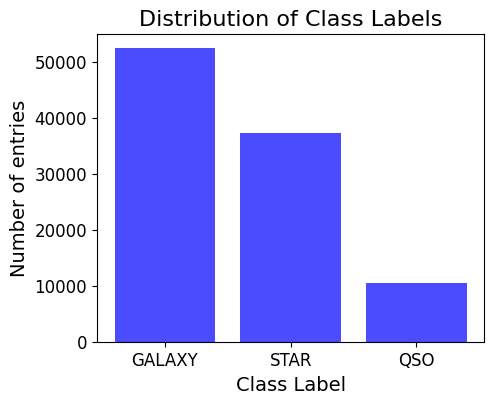

In [40]:
# graph distribution of class labels across data set
class_counts = dataset['class'].value_counts()
plt.figure(figsize=(5, 4))
plt.bar(x=class_counts.index, height=class_counts.values, color='blue', alpha=0.7)
plt.title("Distribution of Class Labels", fontsize=16)
plt.xlabel("Class Label", fontsize=14)
plt.ylabel("Number of entries", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Checking for Outliers
We then visualize each numerical feature using box plots in order to identify potential outliers.

There appear to be significant outliers in the columns: 
i, z, petroR50_u, petroR50_i, petroR50_r, petroR50_z, psfMag_i, psfMag_z,expAB_i, and expAB_z that all fall at or near the -10000 mark.  
However, it may be best to further explore the data first to determine how best to reconcile the outliers (if needed).

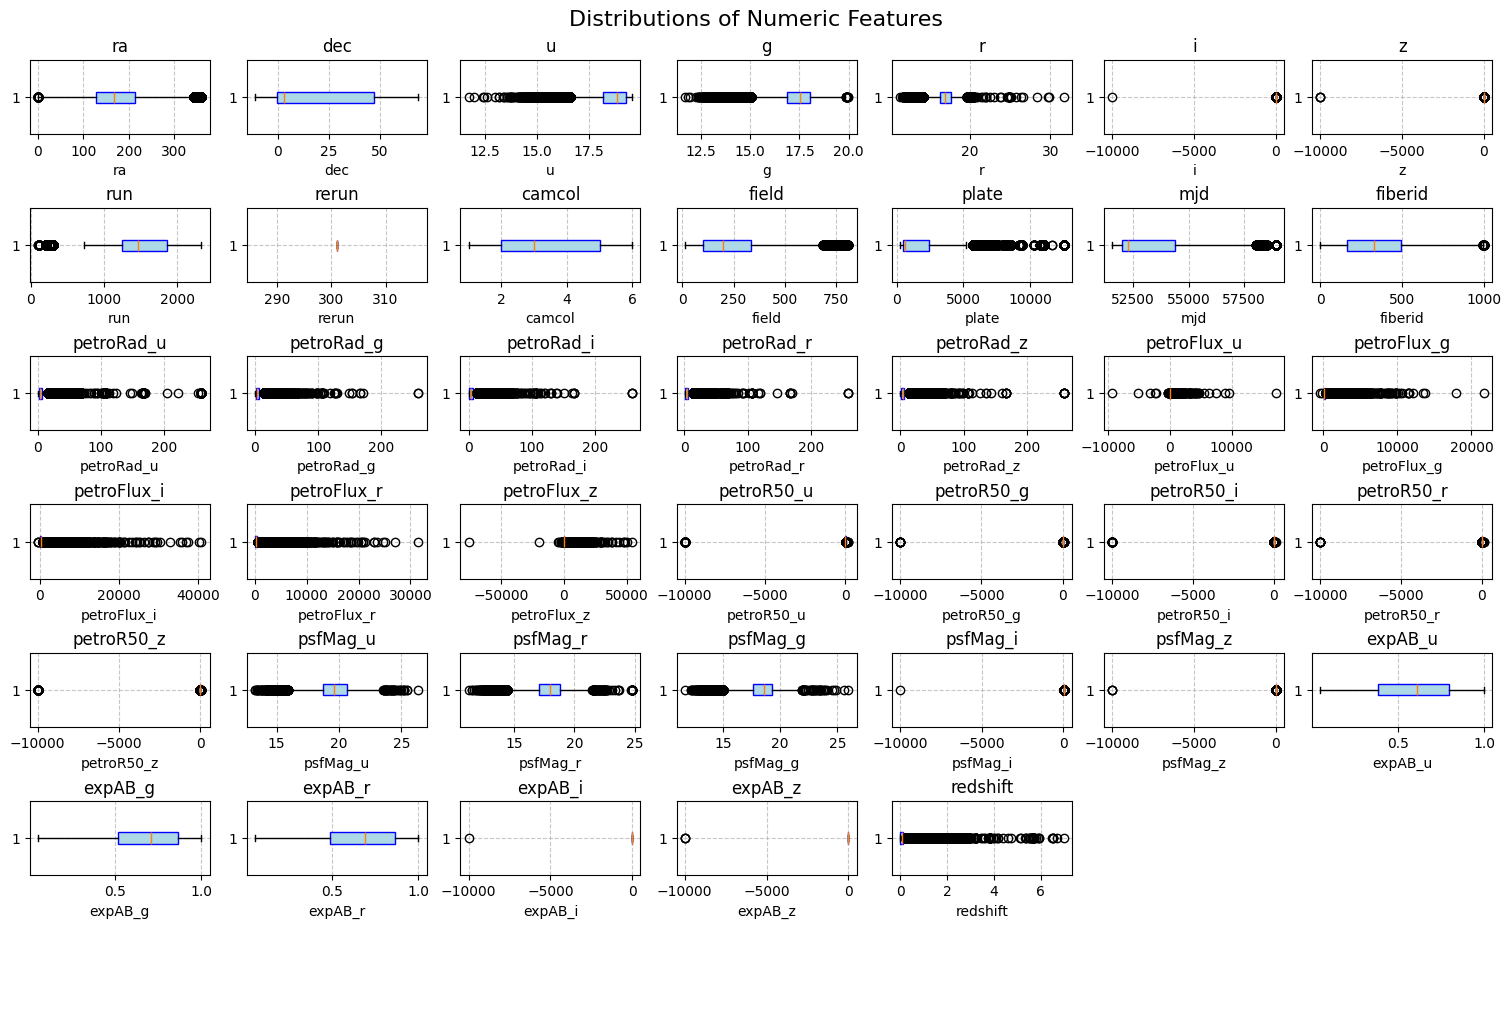

In [ ]:
# check for outliers (box plot/distribution)
numeric_columns = dataset.select_dtypes(include=["int64", "float64"]).columns
num_columns = len(numeric_columns)
grid_size = math.ceil(math.sqrt(num_columns))

fig, axes = plt.subplots(grid_size, grid_size, figsize=(15, 10), constrained_layout=True)
axes = axes.flatten()

for idx, column in enumerate(numeric_columns):
    axes[idx].boxplot(dataset[column].dropna(), vert=False, patch_artist=True,
                      boxprops=dict(facecolor="lightblue", color="blue"))
    axes[idx].set_title(f"{column}")
    axes[idx].set_xlabel(column)
    axes[idx].grid(True, linestyle='--', alpha=0.7)

# hide unused sub-plots
for i in range(len(numeric_columns), len(axes)):
    axes[i].axis('off')

plt.suptitle("Distributions of Numeric Features", fontsize=16)
plt.show()

How would we want to handle these different outliers from the 40 columns? We use the 1.5 IQR Rule, sourcing the pseudo code from geeksforgeeks
    
    Steps in 1.5IQR rule:-

    Finding the median, quartile, and interquartile regions
    Calculate 1.5*IQR below the first quartile and check for low outliers.
    Calculate 1.5*IQR above the third quartile and check for outliers.


In [ ]:
numeric_columns = dataset.select_dtypes(include=["int64", "float64"]).columns
outlier_counts = {}

for col in numeric_columns:
    q1 = dataset[col].quantile(0.25)
    q3 = dataset[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr

    # Identifying outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

    print(f"Column: {col}")
    print(f"Number of outliers: {len(outliers)}\n")

# Optional: Display total outlier counts for all columns
print("Outlier counts for numeric columns:")
print(outlier_counts)

Column: ra
Number of outliers: 4330

Column: dec
Number of outliers: 0

Column: u
Number of outliers: 2933

Column: g
Number of outliers: 1930

Column: r
Number of outliers: 1358

Column: i
Number of outliers: 1521

Column: z
Number of outliers: 1543

Column: run
Number of outliers: 1038

Column: rerun
Number of outliers: 0

Column: camcol
Number of outliers: 0

Column: field
Number of outliers: 2041

Column: plate
Number of outliers: 7125

Column: mjd
Number of outliers: 639

Column: fiberid
Number of outliers: 85

Column: petroRad_u
Number of outliers: 5937

Column: petroRad_g
Number of outliers: 2895

Column: petroRad_i
Number of outliers: 3067

Column: petroRad_r
Number of outliers: 2906

Column: petroRad_z
Number of outliers: 3637

Column: petroFlux_u
Number of outliers: 10475

Column: petroFlux_g
Number of outliers: 9971

Column: petroFlux_i
Number of outliers: 8779

Column: petroFlux_r
Number of outliers: 9186

Column: petroFlux_z
Number of outliers: 8409

Column: petroR50_u
Num

### Visualizing Positional Data

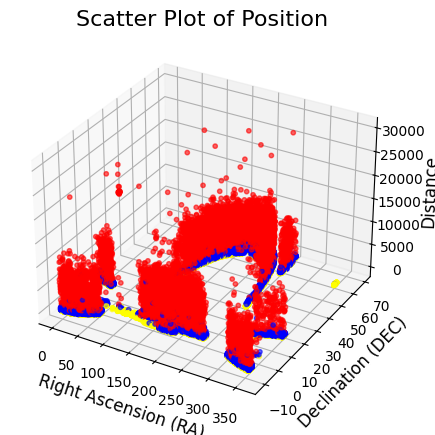

In [ ]:
# scatter plot positional data (ra and declination?)
from mpl_toolkits.mplot3d import Axes3D

c = 3e5
H0 = 70
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    dataset['ra'], 
    dataset['dec'], 
    (c * dataset['redshift']) / H0, # calculate distance using c * redshift / H0
    c=dataset['class'].map({'STAR': 'yellow', 'GALAXY': 'blue', 'QSO': 'red'}),
    alpha=0.6, 
    s=10
)

ax.set_xlabel('Right Ascension (RA)', fontsize=12)
ax.set_ylabel('Declination (DEC)', fontsize=12)
ax.set_zlabel('Distance', fontsize=12)
ax.set_title('Scatter Plot of Position', fontsize=16)
plt.show()

### Correlation Matrix
Creating a correlation matrix for each of the features allows us to determine where different types of correlations exist in our dataset.

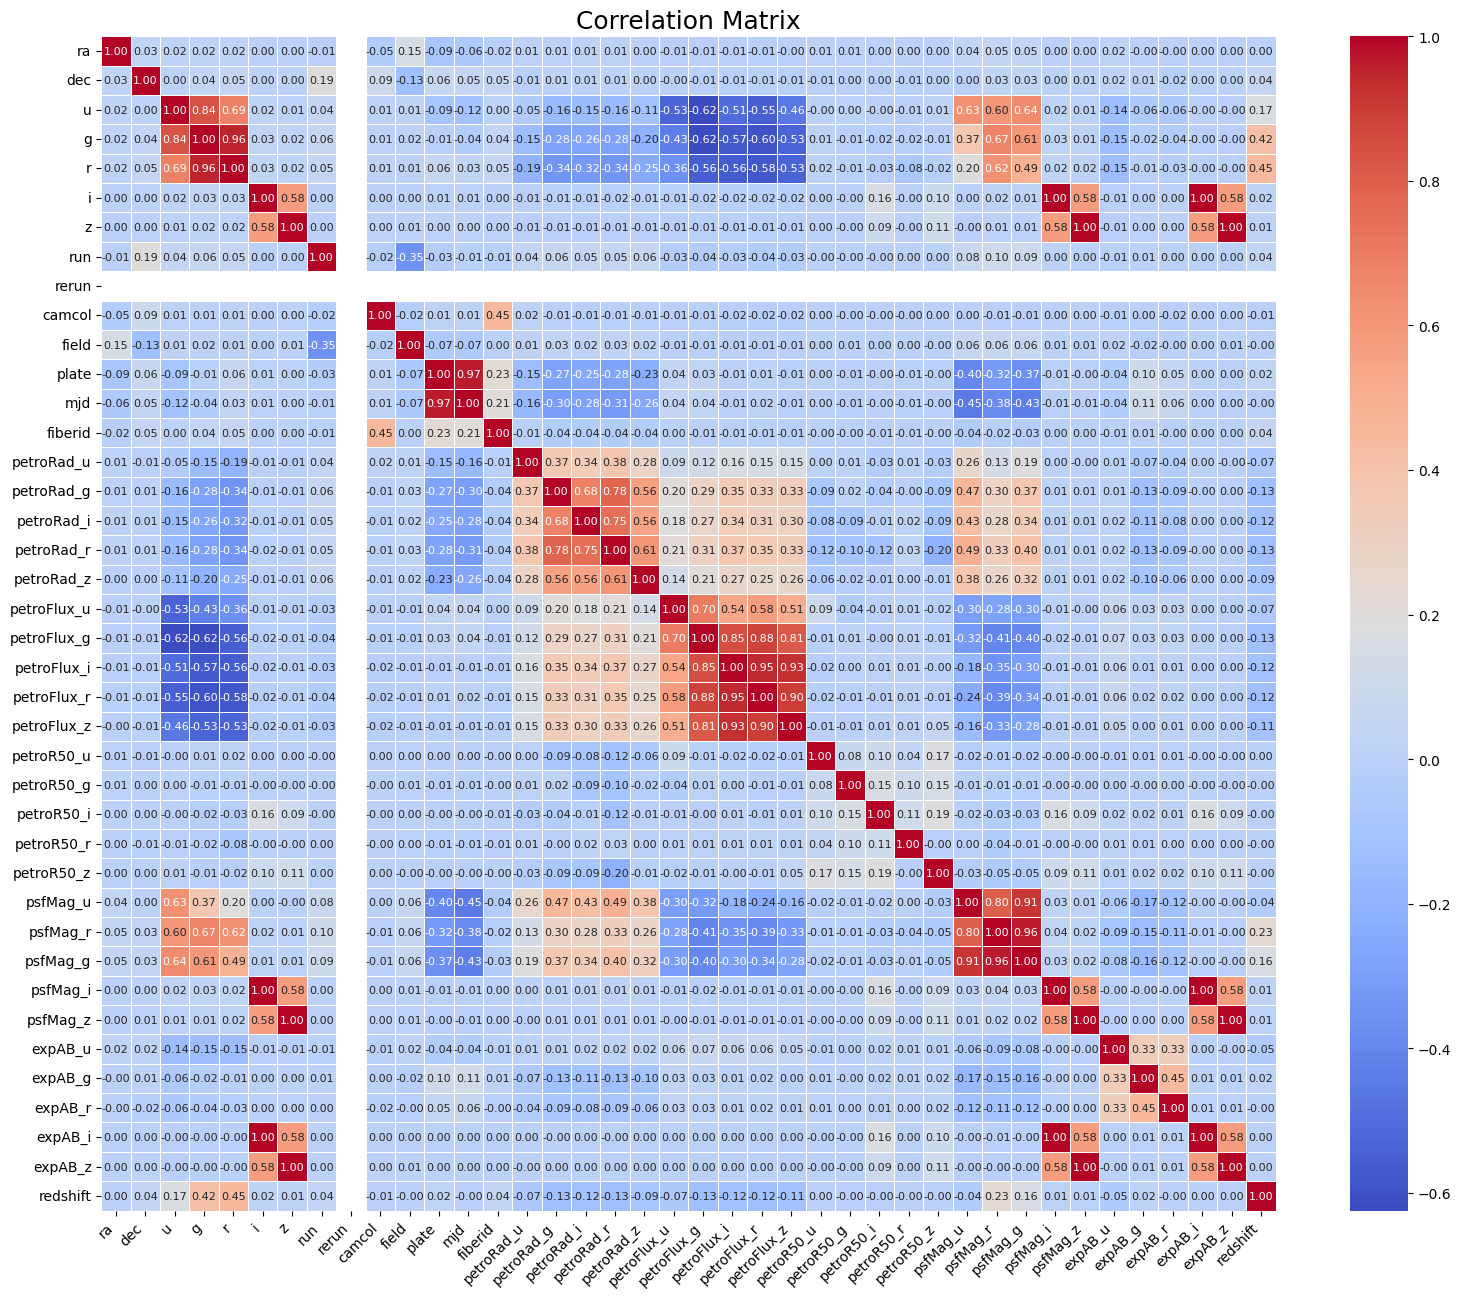

In [ ]:
# display correlation matrices to determine trends in features
numeric_columns = dataset.select_dtypes(include=["int64", "float64"]).columns
correlation_matrix = dataset[numeric_columns].corr()
round(correlation_matrix,2)
plt.figure(figsize=(16, 13))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm", # NOTE: NaN's appear as blank
    cbar=True,
    square=True,
    annot_kws={"size": 8},
    linewidths=0.5,
)
plt.title("Correlation Matrix", fontsize=18)
plt.xticks(fontsize=10, rotation=45, ha="right")
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

## Feature Engineering

### Drop Additional Unnecessary Features
After exploring the data, we can drop features that appear to have little to no correlation to other features. (These are features pertaining to lenses used, date of observance, run numbers, etc.)

In [46]:
to_drop = ['run', 'rerun', 'camcol', 'field', 'plate', 'mjd', 'fiberid']
dataset.drop(columns=to_drop, inplace=True)
dataset.head()

,ra,dec,u,g,r,i,z,petroRad_u,petroRad_g,petroRad_i,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,7.282402,7.004576,6.855976,...,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,1.335305,1.321027,1.167182,...,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,3.874802,3.952013,4.007457,...,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,1.251496,1.325716,1.176959,...,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,1.365736,1.336521,1.161740,...,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR


## Training Pipeline: Data Scaling and Modeling
- Implement different classifiers
- Test correctness

We are using sklearn's RobustScaler because it is less sensitive to large outliers which are present in some features of our data (as seen in the boxplot distributions).

In [58]:
features = dataset.drop(columns=['class'])
labels = dataset['class']
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=1)

# Scale our data -- Use this for models that require scaling
scaler = RobustScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

### Logistic Regression


In [53]:
# Logistic Regression
lr = LogisticRegression(random_state=1, max_iter=10000)
lr.fit(train_features, train_labels)
lr_preds = lr.predict(test_features)

# Evaluate Logistic Regression
log_reg_acc_score = accuracy_score(test_labels, lr_preds)
log_reg_conf_matrix = confusion_matrix(test_labels, lr_preds)
log_reg_class_report = classification_report(test_labels, lr_preds)

print("Logistic Regression Confusion Matrix:\n", log_reg_conf_matrix)
print("Logistic Regression Accuracy:", log_reg_acc_score * 100,'\n')
print("Logistic Regression Classification Report:\n", log_reg_class_report)


Logistic Regression Confusion Matrix:
 [[10336    38    50]
 [   84  2035     1]
 [    8     2  7446]]
Logistic Regression Accuracy: 99.08500000000001 

Logistic Regression Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99     10424
         QSO       0.98      0.96      0.97      2120
        STAR       0.99      1.00      1.00      7456

    accuracy                           0.99     20000
   macro avg       0.99      0.98      0.99     20000
weighted avg       0.99      0.99      0.99     20000



### Decision Tree Classifier

In [59]:
# Decision Tree
dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf.fit(train_features, train_labels)
dt_preds = dt_clf.predict(test_features)

# Evaluate Decision Tree
dt_acc_score = accuracy_score(test_labels, dt_preds)
dt_conf_matrix = confusion_matrix(test_labels, dt_preds)
dt_class_report = classification_report(test_labels, dt_preds)

print("Decision Tree Confusion Matrix:\n", dt_conf_matrix)
print("Decision Tree Accuracy:", dt_acc_score * 100,'\n')
print("Decision Tree Classification Report:\n", dt_class_report)

Decision Tree Confusion Matrix:
 [[10287   132     5]
 [  105  2014     1]
 [   12     2  7442]]
Decision Tree Accuracy: 98.715 

Decision Tree Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99     10424
         QSO       0.94      0.95      0.94      2120
        STAR       1.00      1.00      1.00      7456

    accuracy                           0.99     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.99      0.99      0.99     20000



### K-Nearest Neighbors

In [ ]:
# K Nearest Neighbors
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_model = knn_clf.fit(train_features, train_labels)
knn_preds = knn_clf.predict(test_features)

# Evaluate K Nearest Neighbors
knn_conf_matrix = confusion_matrix(test_labels, knn_preds)
knn_acc_score = accuracy_score(test_labels, knn_preds)
knn_class_report = classification_report(test_labels, knn_preds)

print("KNN Confusion Matrix:\n", knn_conf_matrix)
print("KNN Accuracy:", knn_acc_score * 100,'\n')
print("KNN Classification Report:\n", knn_class_report)

KNN Confusion Matrix:
 [[10337    24    63]
 [  136  1978     6]
 [   39     0  7417]]
KNN Accuracy: 98.66 

KNN Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.99     10424
         QSO       0.99      0.93      0.96      2120
        STAR       0.99      0.99      0.99      7456

    accuracy                           0.99     20000
   macro avg       0.99      0.97      0.98     20000
weighted avg       0.99      0.99      0.99     20000



### Multi-Layer Perceptron (Neural Network)

In [55]:
# Multi-Layer Perceptron (Neural Network)
nn_clf = MLPClassifier()
nn_model = nn_clf.fit(train_features, train_labels)
nn_preds = nn_clf.predict(test_features)

# Evaluate Neural Network
nn_conf_matrix = confusion_matrix(test_labels, nn_preds)
nn_acc_score = accuracy_score(test_labels, nn_preds)
nn_class_report = classification_report(test_labels, nn_preds)

print("Neural Network Confusion Matrix:\n", nn_conf_matrix)
print("Neural Network Accuracy:", nn_acc_score * 100,'\n')
print("Neural Network Classification Report:\n", nn_class_report)


Neural Network Confusion Matrix:
 [[10361    19    44]
 [   79  2039     2]
 [   17     0  7439]]
Neural Network Accuracy: 99.195 

Neural Network Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99     10424
         QSO       0.99      0.96      0.98      2120
        STAR       0.99      1.00      1.00      7456

    accuracy                           0.99     20000
   macro avg       0.99      0.98      0.99     20000
weighted avg       0.99      0.99      0.99     20000



### Random Forest (Ensemble Classifier)

In [57]:
# Random Rorest
rf_clf = RandomForestClassifier(n_estimators=100)
rf_model = rf_clf.fit(train_features, train_labels)
rf_preds = rf_clf.predict(test_features)

# Evaluate Random Forest
rf_conf_matrix = confusion_matrix(test_labels, rf_preds)
rf_acc_score = accuracy_score(test_labels, rf_preds)
rf_class_report = classification_report(test_labels, rf_preds)

print("Random Forest Confusion Matrix:\n", rf_conf_matrix)
print("Random Forest Accuracy:", rf_acc_score * 100,'\n')
print("Random Forest Classification Report:\n", rf_class_report)


Random Forest Confusion Matrix:
 [[10344    40    40]
 [   98  2021     1]
 [    5     0  7451]]
Random Forest Accuracy: 99.08 

Random Forest Classification Report:
               precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99     10424
         QSO       0.98      0.95      0.97      2120
        STAR       0.99      1.00      1.00      7456

    accuracy                           0.99     20000
   macro avg       0.99      0.98      0.98     20000
weighted avg       0.99      0.99      0.99     20000



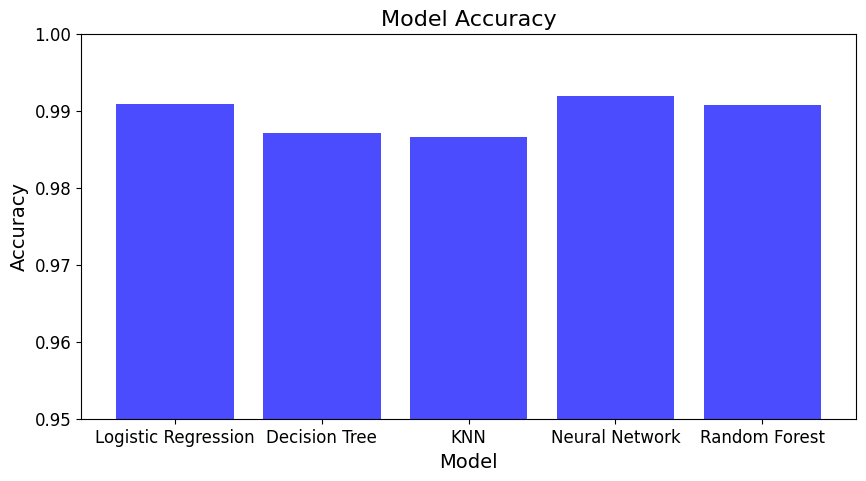

In [62]:
# Graph the accuracy of each model
models = ['Logistic Regression', 'Decision Tree', 'KNN', 'Neural Network', 'Random Forest']
accuracy = [log_reg_acc_score, dt_acc_score, knn_acc_score, nn_acc_score, rf_acc_score]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracy, color='blue', alpha=0.7)
plt.title("Model Accuracy", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.ylim(0.95, 1.0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Hyperparameter Tuning for Best Model

Since MLPClassifier reported the best accuracy metrics we will continue to try to improve our model by tuning some hyperparameters. We are doing this to show what we could do to improve our accuracy. However, we understand that this may not be necessary in our case since we already have high accuracy metrics.

**Hyperparameters:**
- Hidden layer sizes: [30, 40, 50, 60]
- Activation functions: logistic, tanh, ReLu

In [63]:
nn_transformer = RobustScaler()
nn_clf = MLPClassifier()
nn_pl = Pipeline(steps=[('trans', nn_transformer), ('nn', nn_clf)])

nn_param_grid = {
    'nn__hidden_layer_sizes': list(range(30, 61, 10)),
    'nn__activation': ['logistic', 'tanh', 'relu']
}

nn_grid_search = GridSearchCV(nn_pl, nn_param_grid, cv=5, scoring='accuracy')
nn_grid_search.fit(features, labels)
print("Neural Net Best params:", nn_grid_search.best_params_)
print("Neural Net Accuracy:", nn_grid_search.best_score_ * 100)

/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Net Best params: {'nn__activation': 'logistic', 'nn__hidden_layer_sizes': 50}
Neural Net Accuracy: 99.15499999999999


## Summary

In this project, we utilized a dataset from the Sloan Digital Sky Survey (SDSS) with 100,000 observations and 42 features to classify objects as “Star,” “Galaxy,” or “QSO.”

We did the following in our preproccessing:
- Dropped duplicates and invalid entries.
- Converted all class names to uppercase and filtering invalid class labels.
- Handled missing values and removing rows with invalid data types.
- Removed unnecessary identifier columns (e.g., objid, specobjid).

In order to understand our data we did the following:
- Visualized the distribution of class labels to understand class balance.
- Used box plots to identify and quantify outliers across numerical features.
- Applied correlation matrix analysis to assess relationships among features.

We decided to drop features with low correlation to the target variable or other features (e.g., observational metadata). After reducing the dataset to approximately 30 features, we scaled these features using RobustScaler to address the presence of outliers. We chose not to use PCA or other dimensionality reduction techniques, as we felt that 30 was already a manageable number of features.

Next, we trained and evaluated five models. Based on their evaluation reports, we found that the neural network achieved the best accuracy and exhibited strong classification metrics. We proceeded to tune its hyperparameters to further improve accuracy. However, our efforts to increase accuracy were unsuccessful, as it was already exceptionally high.

Although our initial results were promising, we questioned their validity and re-examined our process. Ultimately, we concluded that our approach was correct, supported by the high precision and recall scores in the classification reports. We suspect that the dataset itself contained well-defined patterns or inherent characteristics that contributed to the high scores.